In [3437]:
# %pip install scikit-learn
# %pip install numpy
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn

In [3438]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3439]:
### Loading the Dataset
data = pd.read_csv("House_Rent_Dataset.csv")
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [3440]:
data = data[['BHK', 
             'Bathroom', 
             'Furnishing Status', 
             'Area Type', 
             'City', 
             'Size', 
             'Floor', 
             'Tenant Preferred', 
             'Point of Contact', 
            #  'Area Locality', 
             'Rent']]

In [3441]:
# data = pd.read_csv("House_Rent_Dataset.csv")
# data = data[['Rent', 'City']]
# x = data['City']
# y = data['Rent']
# plt.scatter(x, y)


In [3442]:
# data['Area Locality'].unique()

In [3443]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Bathroom           4746 non-null   int64 
 2   Furnishing Status  4746 non-null   object
 3   Area Type          4746 non-null   object
 4   City               4746 non-null   object
 5   Size               4746 non-null   int64 
 6   Floor              4746 non-null   object
 7   Tenant Preferred   4746 non-null   object
 8   Point of Contact   4746 non-null   object
 9   Rent               4746 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 370.9+ KB


In [3444]:
data.isnull().sum()

BHK                  0
Bathroom             0
Furnishing Status    0
Area Type            0
City                 0
Size                 0
Floor                0
Tenant Preferred     0
Point of Contact     0
Rent                 0
dtype: int64

In [3445]:
def replace_ground_basement(row):
    if 'Ground' in row:
        return row.replace("Ground", '1')
    elif "Upper Basement" in row:
        return row.replace("Upper Basement", '2')
    elif "Lower Basement" in row:
        return row.replace("Lower Basement", '1')
    else:
        return row
    
# First thought is to make basement values as negative but changed my way thinking and just counted the basement values as part of the total number of floors 
    
def replace_out_of(row):
    if " out of " not in row:
        return '1'
    else:
        return row.replace(" out of ", '/')

def evaluate_fraction(row):
    try:
        return eval(row)
    except ZeroDivisionError:
        return None
    
def check_greater_left_value(row):
    if " out of " in row:
        test = row.split(" out of ")
        if int(test[0]) > int(test[1]):
            print(test)
            row = "{} out of {}".format(test[1], test[0])
            return row
        else:
            return row
    else:
        return row

def check_gereater_than_1(row):
    if row > 1:
        print(row)
    return row

In [3446]:
data['Floor'] = data['Floor'].apply(replace_ground_basement)

C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_2808\1510351043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Floor'] = data['Floor'].apply(replace_ground_basement)


In [3447]:
data['Floor'] = data['Floor'].apply(check_greater_left_value)

['8', '5']
['2', '1']


C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_2808\1897272247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Floor'] = data['Floor'].apply(check_greater_left_value)


In [3448]:
data['Floor'] = data['Floor'].apply(replace_out_of)

C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_2808\1467990145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Floor'] = data['Floor'].apply(replace_out_of)


In [3449]:
data['Floor'] = data['Floor'].apply(evaluate_fraction)

C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_2808\1642337134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Floor'] = data['Floor'].apply(evaluate_fraction)


In [3450]:
data['Floor'] = data['Floor'].apply(check_gereater_than_1)

C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_2808\306357726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Floor'] = data['Floor'].apply(check_gereater_than_1)


In [3451]:
data['Floor'].unique()

array([0.5       , 0.33333333, 1.        , 0.25      , 0.66666667,
       0.8       , 0.4       , 0.28571429, 0.875     , 0.75      ,
       0.2       , 0.625     , 0.16666667, 0.6       , 0.57894737,
       0.78571429, 0.7       , 0.15384615, 0.85714286, 0.57142857,
       0.55128205, 0.72222222, 0.41666667, 0.42857143, 0.5483871 ,
       0.52380952, 0.36842105, 0.60869565, 0.45      , 0.22222222,
       0.79166667, 0.14285714, 0.04545455, 0.06896552, 0.125     ,
       0.90909091, 0.70833333, 0.35714286, 0.35      , 0.71428571,
       0.40909091, 0.59090909, 0.5952381 , 0.6097561 , 0.67948718,
       0.65      , 0.69565217, 0.55555556, 0.76190476, 0.3125    ,
       0.7804878 , 0.1       , 0.61904762, 0.31034483, 0.52808989,
       0.17073171, 0.93333333, 0.86666667, 0.26315789, 0.27272727,
       0.4047619 , 0.83333333, 0.63636364, 0.52941176, 0.26666667,
       0.46666667, 0.05      , 0.27777778, 0.5862069 , 0.63157895,
       0.375     , 0.77272727, 0.53333333, 0.48387097, 0.39285

<BarContainer object of 268 artists>

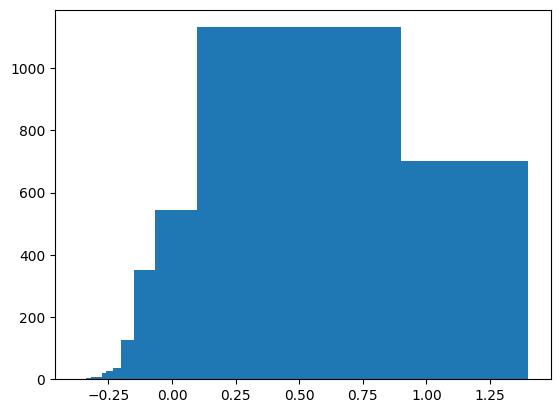

In [3452]:
plt.bar(data['Floor'].value_counts().index, data['Floor'].value_counts().values)

In [3453]:
# data['Area Locality'].unique()[0:50]

In [3454]:
# plt.bar(data['Area Locality'].value_counts().index, data['Area Locality'].value_counts().values)

<BarContainer object of 615 artists>

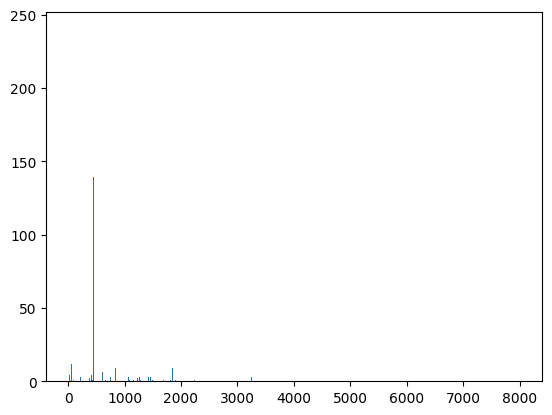

In [3455]:
plt.bar(data['Size'].value_counts().index, data['Size'].value_counts().values)

C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_2808\1622857777.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Rent'])


<Axes: xlabel='Rent', ylabel='Density'>

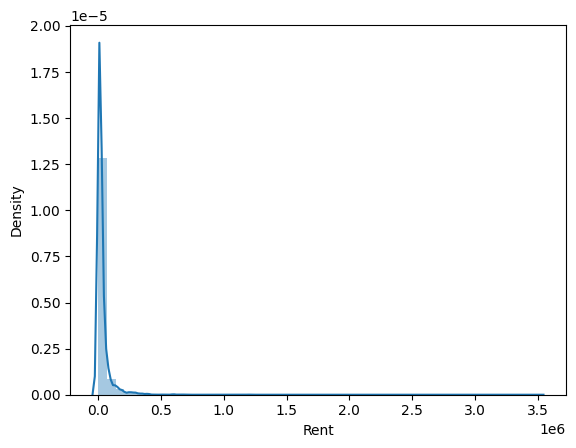

In [3456]:
sns.distplot(data['Rent'])

C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_2808\1729628872.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Size'])


<Axes: xlabel='Size', ylabel='Density'>

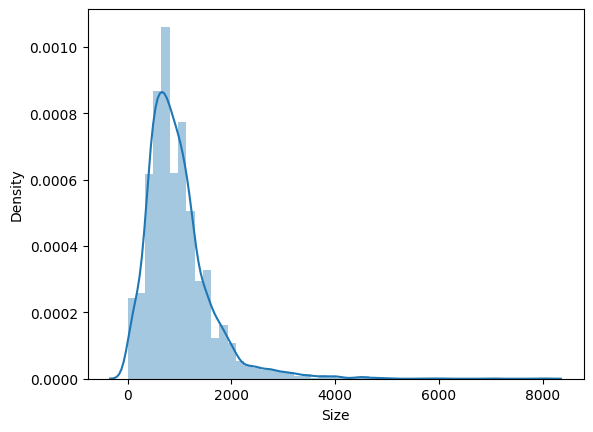

In [3457]:
sns.distplot(data['Size'])

In [3458]:
data['Floor']

0       0.500000
1       0.333333
2       0.333333
3       0.500000
4       0.500000
          ...   
4741    0.600000
4742    0.250000
4743    0.600000
4744    0.676471
4745    0.800000
Name: Floor, Length: 4746, dtype: float64

C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_2808\1297725612.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Floor'])


<Axes: xlabel='Floor', ylabel='Density'>

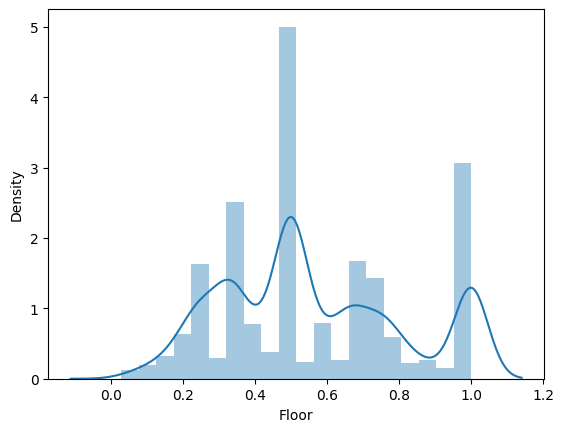

In [3459]:
# data['Floor'].value_counts()
sns.distplot(data['Floor'])

In [3460]:
data['Furnishing Status'].value_counts()

Furnishing Status
Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: count, dtype: int64

In [3461]:
# data['Area Locality'].value_counts()

In [3462]:
def one_hot_encode(data, column, suffix=''):
    encoded = pd.get_dummies(data[column], drop_first= True)
    data = data.drop(column, axis = 1)
    data = data.join(encoded, lsuffix='_data', rsuffix='_encoded')
    # data = data.join(encoded)
    return data

In [3463]:
data = one_hot_encode(data, 'Furnishing Status')
data

,BHK,Bathroom,Area Type,City,Size,Floor,Tenant Preferred,Point of Contact,Rent,Semi-Furnished,Unfurnished
0,2,2,Super Area,Kolkata,1100,0.500000,Bachelors/Family,Contact Owner,10000,False,True
1,2,1,Super Area,Kolkata,800,0.333333,Bachelors/Family,Contact Owner,20000,True,False
2,2,1,Super Area,Kolkata,1000,0.333333,Bachelors/Family,Contact Owner,17000,True,False
3,2,1,Super Area,Kolkata,800,0.500000,Bachelors/Family,Contact Owner,10000,False,True
4,2,1,Carpet Area,Kolkata,850,0.500000,Bachelors,Contact Owner,7500,False,True
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,2,Carpet Area,Hyderabad,1000,0.600000,Bachelors/Family,Contact Owner,15000,True,False
4742,3,3,Super Area,Hyderabad,2000,0.250000,Bachelors/Family,Contact Owner,29000,True,False
4743,3,3,Carpet Area,Hyderabad,1750,0.600000,Bachelors/Family,Contact Agent,35000,True,False
4744,3,2,Carpet Area,Hyderabad,1500,0.676471,Family,Contact Agent,45000,True,False


In [3464]:
data = one_hot_encode(data, 'Area Type')
data

,BHK,Bathroom,City,Size,Floor,Tenant Preferred,Point of Contact,Rent,Semi-Furnished,Unfurnished,Carpet Area,Super Area
0,2,2,Kolkata,1100,0.500000,Bachelors/Family,Contact Owner,10000,False,True,False,True
1,2,1,Kolkata,800,0.333333,Bachelors/Family,Contact Owner,20000,True,False,False,True
2,2,1,Kolkata,1000,0.333333,Bachelors/Family,Contact Owner,17000,True,False,False,True
3,2,1,Kolkata,800,0.500000,Bachelors/Family,Contact Owner,10000,False,True,False,True
4,2,1,Kolkata,850,0.500000,Bachelors,Contact Owner,7500,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,2,Hyderabad,1000,0.600000,Bachelors/Family,Contact Owner,15000,True,False,True,False
4742,3,3,Hyderabad,2000,0.250000,Bachelors/Family,Contact Owner,29000,True,False,False,True
4743,3,3,Hyderabad,1750,0.600000,Bachelors/Family,Contact Agent,35000,True,False,True,False
4744,3,2,Hyderabad,1500,0.676471,Family,Contact Agent,45000,True,False,True,False


In [3465]:
data = one_hot_encode(data, 'City')
# data['City'] = data['City'].astype('category')
# data['City'] = data['City'].cat.codes
data

,BHK,Bathroom,Size,Floor,Tenant Preferred,Point of Contact,Rent,Semi-Furnished,Unfurnished,Carpet Area,Super Area,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,2,2,1100,0.500000,Bachelors/Family,Contact Owner,10000,False,True,False,True,False,False,False,True,False
1,2,1,800,0.333333,Bachelors/Family,Contact Owner,20000,True,False,False,True,False,False,False,True,False
2,2,1,1000,0.333333,Bachelors/Family,Contact Owner,17000,True,False,False,True,False,False,False,True,False
3,2,1,800,0.500000,Bachelors/Family,Contact Owner,10000,False,True,False,True,False,False,False,True,False
4,2,1,850,0.500000,Bachelors,Contact Owner,7500,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,2,1000,0.600000,Bachelors/Family,Contact Owner,15000,True,False,True,False,False,False,True,False,False
4742,3,3,2000,0.250000,Bachelors/Family,Contact Owner,29000,True,False,False,True,False,False,True,False,False
4743,3,3,1750,0.600000,Bachelors/Family,Contact Agent,35000,True,False,True,False,False,False,True,False,False
4744,3,2,1500,0.676471,Family,Contact Agent,45000,True,False,True,False,False,False,True,False,False


In [3466]:
data = one_hot_encode(data, 'Tenant Preferred')
# data

In [3467]:
data = one_hot_encode(data, 'Point of Contact')
# data['Point of Contact'] = data['Point of Contact'].astype('category')
# data['Point of Contact'] = data['Point of Contact'].cat.codes
data

,BHK,Bathroom,Size,Floor,Rent,Semi-Furnished,Unfurnished,Carpet Area,Super Area,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Bachelors/Family,Family,Contact Builder,Contact Owner
0,2,2,1100,0.500000,10000,False,True,False,True,False,False,False,True,False,True,False,False,True
1,2,1,800,0.333333,20000,True,False,False,True,False,False,False,True,False,True,False,False,True
2,2,1,1000,0.333333,17000,True,False,False,True,False,False,False,True,False,True,False,False,True
3,2,1,800,0.500000,10000,False,True,False,True,False,False,False,True,False,True,False,False,True
4,2,1,850,0.500000,7500,False,True,True,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,2,1000,0.600000,15000,True,False,True,False,False,False,True,False,False,True,False,False,True
4742,3,3,2000,0.250000,29000,True,False,False,True,False,False,True,False,False,True,False,False,True
4743,3,3,1750,0.600000,35000,True,False,True,False,False,False,True,False,False,True,False,False,False
4744,3,2,1500,0.676471,45000,True,False,True,False,False,False,True,False,False,False,True,False,False


In [3468]:
# data = one_hot_encode(data, 'Area Locality')
# data['Area Locality'] = data['Area Locality'].astype('category')
# data['Area Locality'] = data['Area Locality'].cat.codes
# data
# Encountered error in Area Locality tried a way to make on_hot_encoding work but it made the result lower therefore I opt not to use this feature

In [3469]:
# from scipy import stats

# def remove_outliers_zscore(df, threshold=3):
#     z_scores = stats.zscore(df)
#     abs_z_scores = abs(z_scores)
#     outliers = (abs_z_scores > threshold).all(axis=1)
#     df_no_outliers = df[~outliers]
#     return df_no_outliers

# # Remove outliers
# df_no_outliers = remove_outliers_zscore(data)

from scipy import stats

# def list_for_removing_outliers_zscore(Column):
#     outlier_indices = set()
#     for i in Column:
#         z = np.abs(stats.zscore(data[i]))
#         # print(z)
#         threshold_z = 2
#         # print("Original DataFrame Shape:", data.shape)
#         # outlier_indices = set(np.where(z > threshold_z)[0])
#         test = np.where(z > threshold_z)[0]
#         for i in test:
#             outlier_indices.add(i)
#     return outlier_indices

# rent_outlier = list_for_removing_outliers_zscore()
# bhk_outlier = list_for_removing_outliers_zscore('BHK')
# size_outlier = list_for_removing_outliers_zscore('Size')

# outlier_indices = list_for_removing_outliers_zscore(['Rent', 'BHK', 'Size'])
# data = data.drop(outlier_indices)

# test = np.where(z > threshold_z)[0]
# for i in test:
#     outlier_indices.add(i)
# # # outlier_indices = 
# data = data.drop(outlier_indices)


z = np.abs(stats.zscore(data['Rent']))
print(z)
threshold_z = 2
print("Original DataFrame Shape:", data.shape)
outlier_indices = np.where(z > threshold_z)[0]
data = data.drop(outlier_indices)
print("DataFrame Shape after Removing Outliers:", data.shape)

0       0.320026
1       0.191982
2       0.230395
3       0.320026
4       0.352037
          ...   
4741    0.256004
4742    0.076743
4743    0.000084
4744    0.128128
4745    0.256004
Name: Rent, Length: 4746, dtype: float64
Original DataFrame Shape: (4746, 18)
DataFrame Shape after Removing Outliers: (4632, 18)


<Axes: ylabel='Rent'>

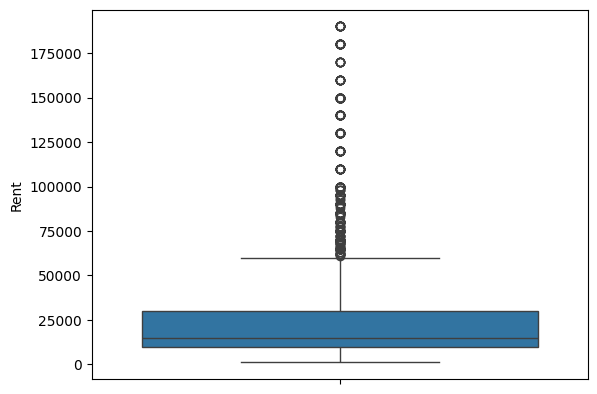

In [3470]:
sns.boxplot(data['Rent'])

In [3471]:
# def removal_box_plot(df, column, threshold):
#     sns.boxplot(df[column])
#     plt.title(f'Original Box Plot of {column}')
#     plt.show()
 
#     removed_outliers = df[df[column] <= threshold]
 
#     sns.boxplot(removed_outliers[column])
#     plt.title(f'Box Plot without Outliers of {column}')
#     plt.show()
#     return removed_outliers
 
 
# threshold_value = 60000
 
# no_outliers = removal_box_plot(data, 'Rent', threshold_value)
# data["Rent"]

In [3472]:
# outlier_indices = np.where((data['Rent'] > 0.12) & (data['Rent'] < 0.8))
 
# no_outliers = data.drop(outlier_indices[0])
 
# # Scatter plot without outliers
# fig, ax_no_outliers = plt.subplots(figsize=(6, 4))
# ax_no_outliers.scatter(no_outliers['Rent'], no_outliers['bp'])
# ax_no_outliers.set_xlabel('(body mass index of people)')
# ax_no_outliers.set_ylabel('(bp of the people )')
# plt.show()

In [3473]:

# # IQR
# Q1 = np.percentile(data['Rent'], 25, method='midpoint')
# Q3 = np.percentile(data['Rent'], 75, method='midpoint')
# IQR = Q3 - Q1
# print(IQR)

In [3474]:
# Q1 = data['Rent'].quantile(0.20)
# Q3 = data['Rent'].quantile(0.80)

# IQR = Q3 - Q1

# lower = Q1 - 1.5*IQR
# upper = Q3 + 1.5*IQR

# upper_array = np.where(data['Rent']>=upper)[0]
# lower_array = np.where(data['Rent']<=lower)[0]

# data.drop(index=upper_array, inplace=True)
# data.drop(index=lower_array, inplace=True)

In [3475]:
X = data.drop('Rent', axis= 1)
y = data['Rent']

In [3476]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

In [3477]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

sc = PolynomialFeatures()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [3478]:
from sklearn import linear_model
from sklearn.linear_model import RidgeCV

# Specify a range of alpha values to test
alphas = [30, 20, 10, 15, 25, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 175, 200, 225, 250, 275, 300, 400, 500]

# Create RidgeCV model with the specified alphas
model = RidgeCV(alphas=alphas, store_cv_values=True)

# Fit the model to your data
model.fit(X_train, y_train)

# Get the optimal alpha value
optimal_alpha = model.alpha_
print(optimal_alpha)

# model = linear_model.LinearRegression()
model = linear_model.Ridge(alpha=optimal_alpha)
model.fit(X_train, y_train)
model.coef_

50


array([ 0.00000000e+00, -1.21629153e+03, -1.07277421e+03,  2.74579629e+01,
       -6.03976168e+02, -1.60753038e+03, -2.61618480e+02, -3.67269365e+02,
        3.47095500e+02,  1.20427406e+03, -6.34918895e+02,  7.33138057e+02,
       -6.52749294e+02, -4.60079246e+02,  6.03264789e+02, -1.46864953e+03,
       -6.88309468e-03,  1.61010396e+03,  7.83626443e+02,  3.11009060e+03,
       -7.33817155e+00,  1.36182718e+03,  1.56017428e+03,  4.96337668e+02,
       -3.81817074e+02, -8.34508592e+02,  8.84772391e+02,  1.31722897e+03,
        8.55254444e+02,  1.34039680e+03, -3.48208690e+03, -7.85034634e+02,
       -1.60735581e+03, -6.88309468e-03, -4.65698254e+02, -8.51927287e+02,
        2.76352105e+00,  1.07238499e+03, -3.97357061e+01,  5.81625602e+02,
        1.30351281e+02, -1.20315963e+03,  2.95515592e+01,  5.87883021e+03,
       -9.63524990e+02,  8.33393549e+02, -2.04215380e+03,  4.99195968e+02,
       -9.21820310e+01, -6.88309468e-03, -3.47423783e+03,  1.09529346e-02,
       -8.12673732e-01, -

In [3479]:
print(f"Regression-Training set score: {model.score(X_train, y_train):.2f}")
print(f"Regression-Test set score: {model.score(X_test, y_test):.2f}")

Regression-Training set score: 0.58
Regression-Test set score: 0.59


In [3480]:
### Quantitative Evaluation
y_preds = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficients: 
 [ 0.00000000e+00 -1.21629153e+03 -1.07277421e+03  2.74579629e+01
 -6.03976168e+02 -1.60753038e+03 -2.61618480e+02 -3.67269365e+02
  3.47095500e+02  1.20427406e+03 -6.34918895e+02  7.33138057e+02
 -6.52749294e+02 -4.60079246e+02  6.03264789e+02 -1.46864953e+03
 -6.88309468e-03  1.61010396e+03  7.83626443e+02  3.11009060e+03
 -7.33817155e+00  1.36182718e+03  1.56017428e+03  4.96337668e+02
 -3.81817074e+02 -8.34508592e+02  8.84772391e+02  1.31722897e+03
  8.55254444e+02  1.34039680e+03 -3.48208690e+03 -7.85034634e+02
 -1.60735581e+03 -6.88309468e-03 -4.65698254e+02 -8.51927287e+02
  2.76352105e+00  1.07238499e+03 -3.97357061e+01  5.81625602e+02
  1.30351281e+02 -1.20315963e+03  2.95515592e+01  5.87883021e+03
 -9.63524990e+02  8.33393549e+02 -2.04215380e+03  4.99195968e+02
 -9.21820310e+01 -6.88309468e-03 -3.47423783e+03  1.09529346e-02
 -8.12673732e-01 -7.75746138e+00 -9.31681271e+00  4.92258669e+00
  5.46870793e+00 -3.05597643e+00 -6.03662851e+00 -6.22582748e+00
 -8.65003

162288055.35 with locality
161555549.72 without locality

In [3481]:
### Qualitative Evaluation
sample_data = X.iloc[0]

sample_data_standardized = sc.transform(X.iloc[0].values.reshape(1,-1))
sample_data_standardized

c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.00e+00, 2.00e+00, 2.00e+00, 1.10e+03, 5.00e-01, 0.00e+00,
        1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        4.00e+00, 4.00e+00, 2.20e+03, 1.00e+00, 0.00e+00, 2.00e+00,
        0.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 2.00e+00,
        0.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 2.00e+00, 4.00e+00,
        2.20e+03, 1.00e+00, 0.00e+00, 2.00e+00, 0.00e+00, 2.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 2.00e+00, 0.00e+00, 2.00e+00,
        0.00e+00, 0.00e+00, 2.00e+00, 1.21e+06, 5.50e+02, 0.00e+00,
        1.10e+03, 0.00e+00, 1.10e+03, 0.00e+00, 0.00e+00, 0.00e+00,
        1.10e+03, 0.00e+00, 1.10e+03, 0.00e+00, 0.00e+00, 1.10e+03,
        2.50e-01, 0.00e+00, 5.00e-01, 0.00e+00, 5.00e-01, 0.00e+00,
        0.00e+00, 0.00e+00, 5.00e-01, 0.00e+00, 5.00e-01, 0.00e+00,
        0.00e+00, 5.00e-01, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 

In [3482]:
model_rent_forecast = model.predict(sample_data_standardized)[0]
model_rent_forecast

12634.248155456222

In [3483]:
y.iloc[0]

10000

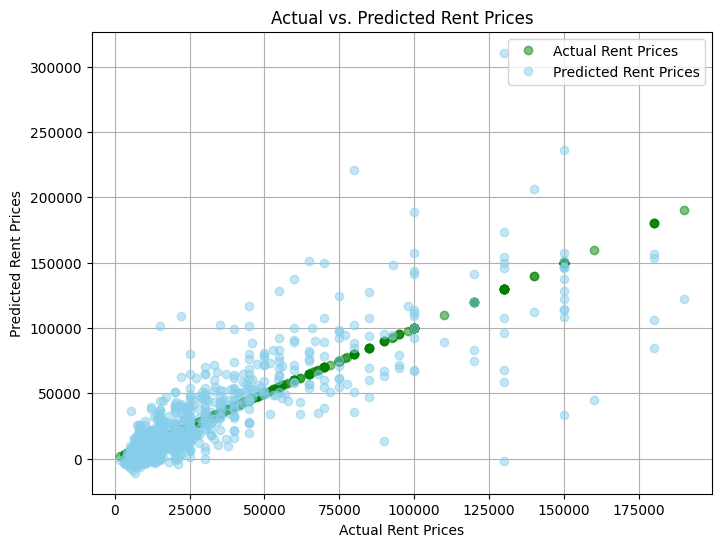

In [3484]:
plt.figure(figsize=(8,6))
plt.plot(y_test, y_test, 'o', alpha=0.5, color='green', label='Actual Rent Prices')
plt.plot(y_test, y_preds, 'o', alpha=0.5, color='skyblue', label='Predicted Rent Prices')

plt.title("Actual vs. Predicted Rent Prices")
plt.xlabel("Actual Rent Prices")
plt.ylabel("Predicted Rent Prices")

plt.legend()
plt.grid(True)
plt.show()